In [1]:
#!pip install trafilatura

In [2]:
import os

import numpy as np
import pandas as pd

from lxml import html
from bs4 import BeautifulSoup
import trafilatura

In [3]:
#!npx degit kelu124/substack/.archive substack --force

In [4]:
files = os.listdir('.archive')
file_names = []
for name in files:
    if not ('type' in name):
        file_names.append(name)

In [5]:
D = pd.read_parquet('articles.parquet.gzip')

In [6]:
DONE = list(D.file_name)

In [7]:
import io

In [8]:
articles = []
errors = []
for file_name in file_names:
    if file_name not in DONE:
        with io.open(f'.archive/{file_name}', mode="r", encoding="utf-8") as f:
            try:
                mytree = html.fromstring("".join(f.readlines()))
            except Exception as e:
                print(file_name,e)
                errors.append(file_name)
                continue
            try:
                content = trafilatura.extract(mytree)
                articles.append((file_name, content))
            except Exception as e:
                print(file_name,e)
                errors.append(file_name)

1adf22e202e6fbf70cab0817e9900a63 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
90ff840ab083c871304f6c064a686163 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
ae139bd8ae8643afb759fbac296ee6f9 'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
f0a23dcd98c2fdf0a3fd523a04e7c255 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
679dc202eff2e27018dc9d59ef4ab209 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
14d1644363556a7c406cd6c2b4b824b1 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
d5d984108e1458c134b8b5d1bb3a3baa 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
c6f072d0bb096cc48a03e042dc98a9d9 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
18cfbb0e23ac94c1ae56348a3663c73c 'lxml.etree._Element' object has no attribute 'text_content'
3cb0698c48f534f632b96a09dd33654c 'utf-8' codec can't decode byte 0

d3f7d6770f4f6930888e1d6cba8b4954 'utf-8' codec can't decode byte 0xd3 in position 10: invalid continuation byte
97101dd77b09c7dc43ab46e9f0f60624 'utf-8' codec can't decode byte 0xd4 in position 10: invalid continuation byte
8062ff778542afaf2a45352ffc6506ce 'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
15f4a03185a33042ac3bb1384ac23793 'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
bf71558be9e9adbaeaa587c79c7fcecd 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
3b92dc627d73b0d586fcff194b697c89 'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
627d69844d85a2a6340b218710657371 Unicode strings with encoding declaration are not supported. Please use bytes input or XML fragments without declaration.
74a2fddcca2cb42b3060ab6fb4c2ca83 'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
93aeecc59e527115f472033b47c1392b 'utf-8' codec can't decode byte 0x89

f45915b76648aae5284d9e62cc52b861 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
3add41422d872968282e56d9b6e57c2c 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
1ce8533360ec8b95e778b53153faea71 'utf-8' codec can't decode byte 0x8f in position 10: invalid start byte
896e3af0dfeb38e8bee75707bfdd9dde 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
d7a4561235ab6f6e3ff567418e13ba68 'utf-8' codec can't decode byte 0xf6 in position 10: invalid start byte
b6e65e18e8e519dfe8c020bb10657345 'utf-8' codec can't decode byte 0x8f in position 10: invalid start byte
1e8daae419f76ec2fea73a75e9ff6e50 'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
d7ad9b85b9cb6a8e5678bd03064203db 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
164beca20acd8644e6256be6da806d00 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
6bd78cfb69be085217ee3064fc3707f3 'utf-8' codec can't 

In [9]:
NEW = pd.DataFrame(articles, columns = ['file_name', 'content'])
NEW["LEN"] = NEW["content"].apply(lambda x: len(str(x)))
NEW

,file_name,content,LEN
0,3ec2eb18bb7e968e35126351c05d7d8b,wsj.comPlease enable JS and disable any ad blo...,50
1,3af61c0b34c49371a1361fff0ff71634,A person jumped on the hood of a Waymo driverl...,2412
2,8733778acc3402584c9653dbe872bf8c,Today’s post is the final one in my series on ...,9862
3,bdf1b2cfe61370414a183a2690be33e2,stlite: Serverless Streamlit — Run Your Apps i...,2020
4,3b1f8558dd4d35b81f17be6e7cdcd3a7,"On Tuesday, the United States Patent and Trade...",2951
...,...,...,...
81,b383b31199fde1a4daff900b478882ee,wsj.comPlease enable JS and disable any ad blo...,50
82,fe93f7419799d1706b4e7ce0a6adcb40,Cyborg computer combining AI and human brain c...,2445
83,5491d4a9248c9b6f44f91fa0c4f04c73,Le déploiement d’applications à base d’intelli...,6401
84,25f3ff23280cd27f74b3b60e9168d657,Iranian state-backed hackers interrupted TV st...,2208


In [10]:
len(NEW),len(D)

(86, 1791)

In [11]:
df = pd.concat([NEW,D]).reset_index(drop=True)
len(df)
df

,file_name,content,LEN
0,3ec2eb18bb7e968e35126351c05d7d8b,wsj.comPlease enable JS and disable any ad blo...,50
1,3af61c0b34c49371a1361fff0ff71634,A person jumped on the hood of a Waymo driverl...,2412
2,8733778acc3402584c9653dbe872bf8c,Today’s post is the final one in my series on ...,9862
3,bdf1b2cfe61370414a183a2690be33e2,stlite: Serverless Streamlit — Run Your Apps i...,2020
4,3b1f8558dd4d35b81f17be6e7cdcd3a7,"On Tuesday, the United States Patent and Trade...",2951
...,...,...,...
1872,e8b7faf708568f9f39abe04b778c4631,I would say my efficiency is up ~20% since sta...,14337
1873,b79a2baa87b68283198416791b93bce4,The U.S. government has restricted sales of Nv...,2125
1874,d89d7cc690ceaaafaecc9f40ff8230c5,My kids and I just played D&D with ChatGPT4 as...,34489
1875,69637dcd83c48ebde0610a61a27b1989,The newest Kindle is the first truly new Kindl...,6249


In [12]:
df.to_parquet('articles.parquet.gzip',compression="gzip")

In [13]:
# More testing here about the coherent text that has to be found, find upper elements if p doesn't mention classes. 
# or merge everything than clean up.


In [14]:
df = pd.read_parquet('articles.parquet.gzip')
strs = ["detected unusual","enable JS", "nable Javascript","Checking your browser","mettre à jour votre navigateur","nable JavaScript","Adobe Acrobat JavaScript","please click the box below to","site connection is secure","Optica Publishing Group","switch to a supported browser"]
df = df[df['content'].astype(str).str.contains("|".join(strs))]
df.to_parquet("to_process_selenium.parquet.gzip",compression="gzip")

In [15]:
df = pd.read_parquet('articles.parquet.gzip')
df

,file_name,content,LEN
0,3ec2eb18bb7e968e35126351c05d7d8b,wsj.comPlease enable JS and disable any ad blo...,50
1,3af61c0b34c49371a1361fff0ff71634,A person jumped on the hood of a Waymo driverl...,2412
2,8733778acc3402584c9653dbe872bf8c,Today’s post is the final one in my series on ...,9862
3,bdf1b2cfe61370414a183a2690be33e2,stlite: Serverless Streamlit — Run Your Apps i...,2020
4,3b1f8558dd4d35b81f17be6e7cdcd3a7,"On Tuesday, the United States Patent and Trade...",2951
...,...,...,...
1872,e8b7faf708568f9f39abe04b778c4631,I would say my efficiency is up ~20% since sta...,14337
1873,b79a2baa87b68283198416791b93bce4,The U.S. government has restricted sales of Nv...,2125
1874,d89d7cc690ceaaafaecc9f40ff8230c5,My kids and I just played D&D with ChatGPT4 as...,34489
1875,69637dcd83c48ebde0610a61a27b1989,The newest Kindle is the first truly new Kindl...,6249


In [16]:
# Removing unaccessible articles
df = df[~(df['content'] == "Please switch to a supported browser to continue using twitter.com. You can see a list of supported browsers in our Help Center.\nHelp Center\nTerms of Service\nPrivacy Policy\nCookie Policy\nImprint\nAds info\n© 2022 Twitter, Inc.")]
df = df[df.LEN >= 1500]
df

,file_name,content,LEN
1,3af61c0b34c49371a1361fff0ff71634,A person jumped on the hood of a Waymo driverl...,2412
2,8733778acc3402584c9653dbe872bf8c,Today’s post is the final one in my series on ...,9862
3,bdf1b2cfe61370414a183a2690be33e2,stlite: Serverless Streamlit — Run Your Apps i...,2020
4,3b1f8558dd4d35b81f17be6e7cdcd3a7,"On Tuesday, the United States Patent and Trade...",2951
5,0b61f19e9bb65abe78eb147498025f13,Fugitive Wirecard COO Jan Marsalek wasn’t just...,50321
...,...,...,...
1871,3fbb11d6e949d1e662aa6a146bb6cda0,China’s growing number of insomniacs are turni...,2859
1872,e8b7faf708568f9f39abe04b778c4631,I would say my efficiency is up ~20% since sta...,14337
1873,b79a2baa87b68283198416791b93bce4,The U.S. government has restricted sales of Nv...,2125
1874,d89d7cc690ceaaafaecc9f40ff8230c5,My kids and I just played D&D with ChatGPT4 as...,34489


In [17]:
df.describe()

,LEN
count,1509.000000
mean,11711.360504
std,20743.506341
min,1505.000000
25%,3777.000000
50%,6828.000000
75%,12892.000000
max,496896.000000


In [18]:
# TF-IDF Feature Generation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# # Vectorize document using TF-IDF
tf_idf_vect = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,2),
                        tokenizer = tokenizer.tokenize)

# Fit and Transfrom Text Data
X_train_counts = tf_idf_vect.fit_transform(df['content'])

# Check Shape of Count Vector
X_train_counts.shape

/home/kelu/.local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(1509, 1221443)

In [19]:
X_train_counts[0]

<1x1221443 sparse matrix of type '<class 'numpy.float64'>'
	with 407 stored elements in Compressed Sparse Row format>

In [20]:
from sklearn.cluster import KMeans

# Create Kmeans object and fit it to the training data 
kmeans = KMeans(n_clusters=10).fit(X_train_counts)

# Get the labels using KMeans
pred_labels = kmeans.labels_

In [21]:
# Import WordCloud and STOPWORDS
from wordcloud import WordCloud
from wordcloud import STOPWORDS
# Import matplotlib
import matplotlib.pyplot as plt 


def word_cloud(text,wc_title,wc_file_name='wordcloud.jpeg'):
    # Create stopword list
    stopword_list = set(STOPWORDS) 

    # Create WordCloud 
    word_cloud = WordCloud(width = 800, height = 500, 
                           background_color ='white', 
                           stopwords = stopword_list, 
                           min_font_size = 14).generate(text) 

    # Set wordcloud figure size
    plt.figure(figsize = (8, 6)) 
    
    # Set title for word cloud
    plt.title(wc_title)
    
    # Show image
    plt.imshow(word_cloud) 

    # Remove Axis
    plt.axis("off")  

    # save word cloud
    # plt.savefig(wc_file_name,bbox_inches='tight')

    # show plot
    plt.show()

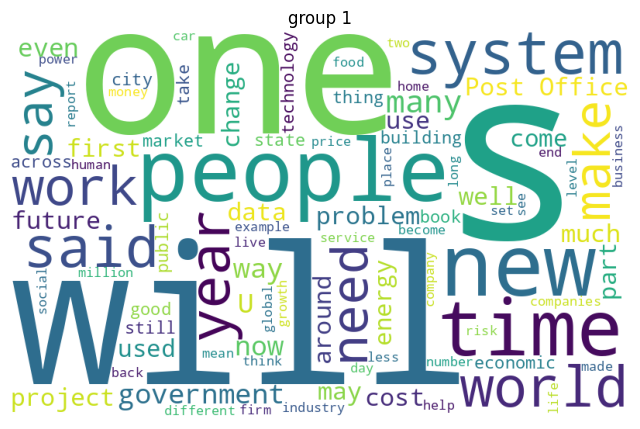

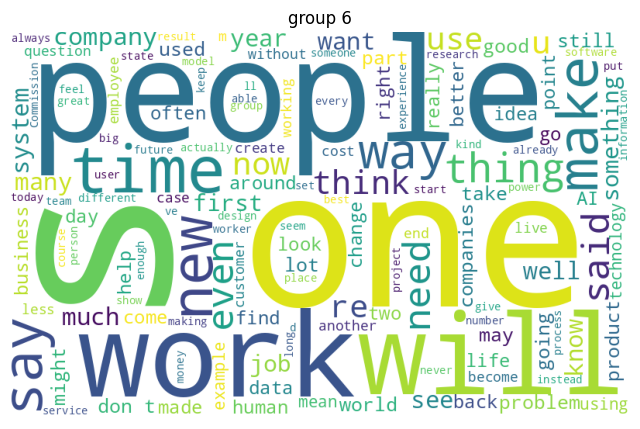

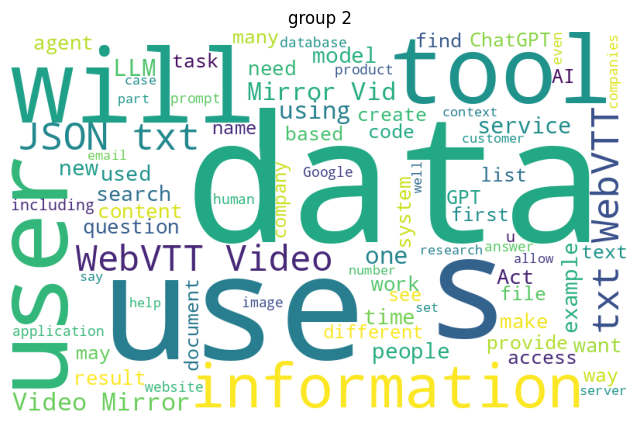

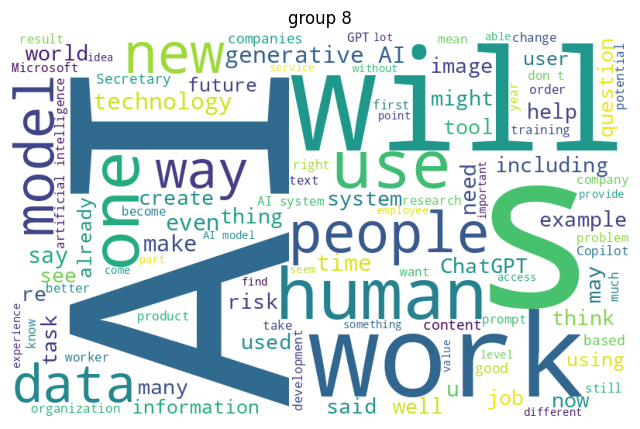

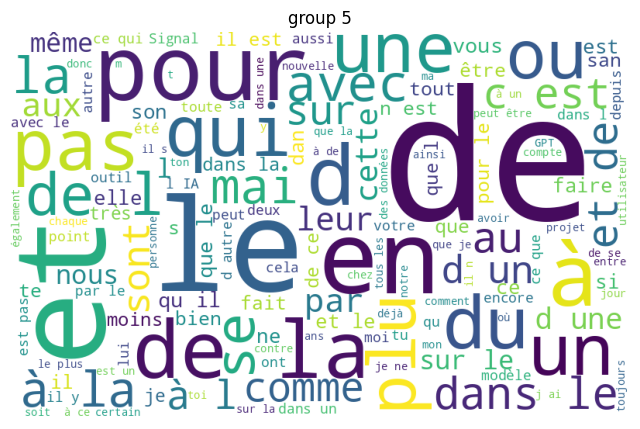

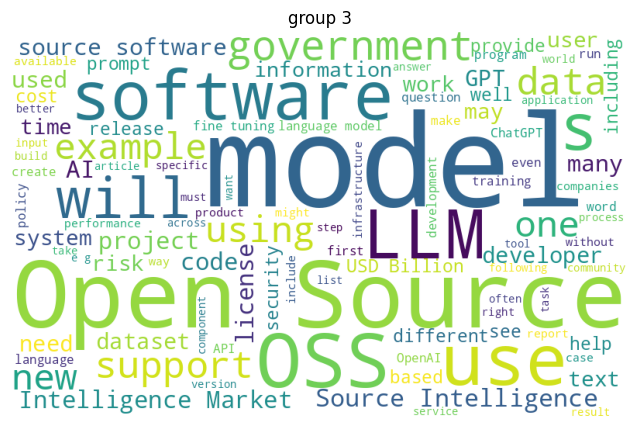

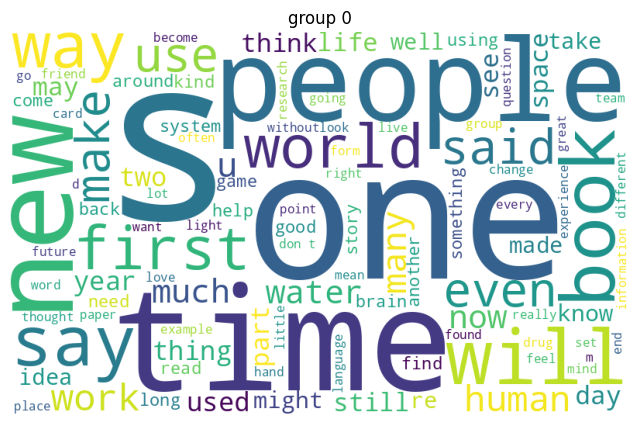

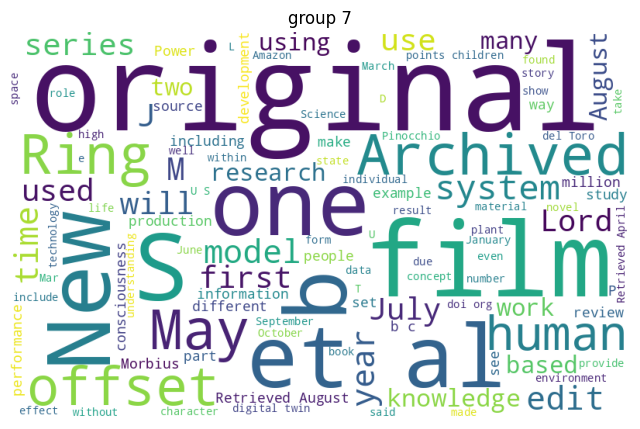

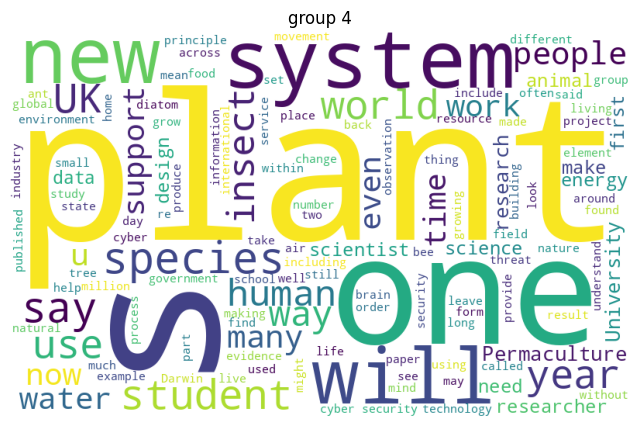

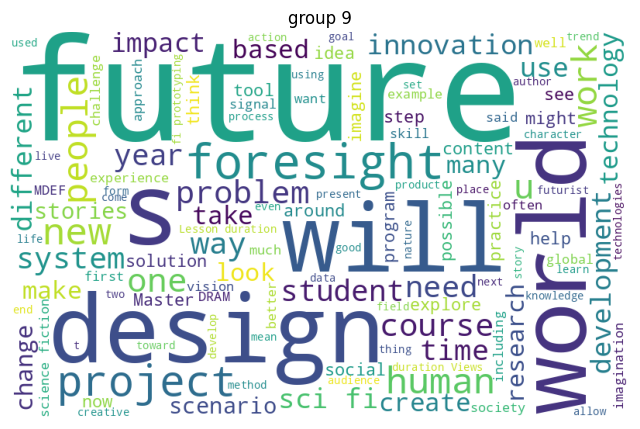

In [22]:
import pandas as pd
new_df=pd.DataFrame({"text":df['content'],"labels":pred_labels})


for i in new_df.labels.unique():
    new_new_df=new_df[new_df.labels==i]
    text="".join(new_new_df.text.tolist())
    word_cloud(text,f"group {i}",f'{i}.jpeg')

In [23]:
# new_df includes the category for errord ones as well.

# No context is given, so the group name is default to the group number.

# We can use the common words found in each group to formulate a title?
new_df.to_csv('grouped_articles.csv')

In [24]:
new_df

,text,labels
1,A person jumped on the hood of a Waymo driverl...,1
2,Today’s post is the final one in my series on ...,6
3,stlite: Serverless Streamlit — Run Your Apps i...,2
4,"On Tuesday, the United States Patent and Trade...",8
5,Fugitive Wirecard COO Jan Marsalek wasn’t just...,6
...,...,...
1871,China’s growing number of insomniacs are turni...,0
1872,I would say my efficiency is up ~20% since sta...,2
1873,The U.S. government has restricted sales of Nv...,6
1874,My kids and I just played D&D with ChatGPT4 as...,0
